# Process Data from files

- Pre requisities: have multiple files with loops

# Date time helper functions

In [1]:
# Turn Avisi Datetime string to python DateTime object
def avisi_str_to_datetime(avisi_str):
    dt_pattern = pattern = '%Y-%m-%dT%H:%M:%S.%fZ' # pattern of how api passes date times. The Z at the end indicates UTC time
    return dt.datetime.strptime(avisi_str, dt_pattern)

# express date time as a floating number
def datetime_to_float(d):
    return d.timestamp()

def float_to_datetime(f):
    return dt.datetime.fromtimestamp(f)

def datetime_to_avisi_str(dtime):
    return dtime.strftime('%Y-%m-%dT%H:%M:%S.%fZ')

# Plotting data from file in line

In [9]:
import json
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
import numpy as np

def get_data_x_position_coordinates_by_file_name(file_name):
    big_data_x_coordinates = []

    with open(file_name, 'r') as file:
        lines = file.readlines()

        for line in lines:
            coordinate = []
            json_line = json.loads(line)

            datetime_obj = avisi_str_to_datetime(json_line['timestamp'])
            datetime_as_float = datetime_to_float(datetime_obj)

            coordinate.append(datetime_as_float)
            coordinate.append(json_line['x_position'])
            big_data_x_coordinates.append(coordinate)

    return big_data_x_coordinates

def get_data_y_position_coordinates_by_file_name(file_name):
    big_data_y_coordinates = []

    with open(file_name, 'r') as file:
        lines = file.readlines()

        for line in lines:
            coordinate = []
            json_line = json.loads(line)

            datetime_obj = avisi_str_to_datetime(json_line['timestamp'])
            datetime_as_float = datetime_to_float(datetime_obj)

            coordinate.append(datetime_as_float)
            coordinate.append(json_line['y_position'])
            big_data_y_coordinates.append(coordinate)

    return big_data_y_coordinates

def plot_rat_run_by_file(file_name, x_or_y = "x", plot_name="NO_NAME"):
    full_coords = []
    
    if x_or_y == "x":
        full_coords = get_data_x_position_coordinates_by_file_name(file_name)
    else:
        full_coords = get_data_y_position_coordinates_by_file_name(file_name)

    plt.plot(*zip(*full_coords))
    plt.title(plot_name)

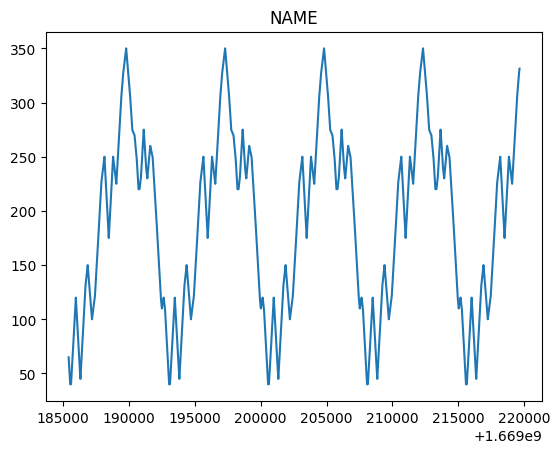

In [10]:
plot_rat_run_by_file(r"..\Retrieve_Data\FromAPI\data_from_api0.txt", "x", "NAME")

# Actual plotting

In [14]:
total_duration_as_float_all = []

# The input of this function should be exactly 1 completed rat run in a txt file
def print_single_rat_run_info(file_location):
    with open(file_location, 'r') as file:
        lines = file.readlines()

        first_line = json.loads(lines[0])
        last_line = json.loads(lines[len(lines)-1])
        
        first_line_timestamp_float = datetime_to_float(avisi_str_to_datetime(first_line['timestamp']))
        last_line_timestamp_float = datetime_to_float(avisi_str_to_datetime(last_line['timestamp']))
        
        total_duration_as_float = last_line_timestamp_float - first_line_timestamp_float
        total_duration_as_float_all.append(total_duration_as_float)
        
        start_dt_object = dt.datetime.fromtimestamp(first_line_timestamp_float)
        end_dt_object = dt.datetime.fromtimestamp(last_line_timestamp_float)
        
        print(file_location + " duration: " + str(end_dt_object - start_dt_object) + " as float: " + str(total_duration_as_float))

def print_all_single_rat_runs_in_folder(folder_location, n_of_runs):
    index = 0
    
    for x in range(0, n_of_runs):
        file_location_and_name = folder_location + "/complete_rat_run" + str(index) + ".txt"
        print("Doing rat_run " + str(x))
        print_single_rat_run_info(file_location_and_name)
        index += 1

In [18]:
# Call
print_all_single_rat_runs_in_folder(r"./Single_Runs", 4)

Doing rat_run 0
./Single_Runs/complete_rat_run0.txt duration: 2:05:04.922955 as float: 7504.922955036163
Doing rat_run 1
./Single_Runs/complete_rat_run1.txt duration: 2:05:04.724219 as float: 7504.724219083786
Doing rat_run 2
./Single_Runs/complete_rat_run2.txt duration: 2:05:04.912795 as float: 7504.9127950668335
Doing rat_run 3
./Single_Runs/complete_rat_run3.txt duration: 2:05:04.994891 as float: 7504.994890928268


In [31]:
# Generate 1 big file with all timestamp

Lets try with '2:05:05.000000' time added

In [33]:
extra_time_to_add = 7504.994890928268 # IF THIS VALUE IS CORRECT, IT SHOULD ALL BE FINE

def do_n_rat_runs(n_of_runs):
    NEW_FILES_LOCATION = "./Data/MultipleRuns/Singles"
    BASE_FILE_LOCATION = "./Data/Single_Requests/base_run.txt"
    
    for iteration in range(0, n_of_runs):
        print("Doing run " + str(iteration))
        file_name = "run" + str(iteration) + ".txt"
        new_file_location = NEW_FILES_LOCATION + "/" + file_name
        
        create_txt_file_for_single_run(file_name)
        write_new_values_to_txt_file(new_file_location, BASE_FILE_LOCATION)
        BASE_FILE_LOCATION = new_file_location       
        
    print("Done...")
    
def create_txt_file_for_single_run(file_name):
     open('./Data/MultipleRuns/Singles/' + file_name, 'w')
        
def write_new_values_to_txt_file(new_file, from_file):
    APPENDED_FILES_LOCATION = "./Data/MultipleRuns/appended_results.txt"
    
    with open(from_file, 'r') as file: # File base
        lines = file.readlines()

    with open(APPENDED_FILES_LOCATION, 'a') as file: # File to add new data to
        for line in lines:

            json_line = json.loads(line)
            #print(json_line)

            old_ts = datetime_to_float(avisi_str_to_datetime(json_line['timestamp']))
            new_ts = old_ts + extra_time_to_add

            new_datetime = float_to_datetime(new_ts)
            new_avisi_datetime = datetime_to_avisi_str(new_datetime)

            json_line['timestamp'] = new_avisi_datetime

            #print(json_line)
            file.write(json.dumps(json_line))
            file.write("\n")

    with open(new_file, 'w') as file: # Newly created file
        for line in lines:

            json_line = json.loads(line)
            #print(json_line)

            old_ts = datetime_to_float(avisi_str_to_datetime(json_line['timestamp']))
            new_ts = old_ts + extra_time_to_add

            new_datetime = float_to_datetime(new_ts)
            new_avisi_datetime = datetime_to_avisi_str(new_datetime)

            json_line['timestamp'] = new_avisi_datetime

            #print(json_line)
            file.write(json.dumps(json_line))
            file.write("\n")    

In [34]:
do_n_rat_runs(10)

Doing run 0
Doing run 1
Doing run 2
Doing run 3
Doing run 4
Doing run 5
Doing run 6
Doing run 7
Doing run 8
Doing run 9


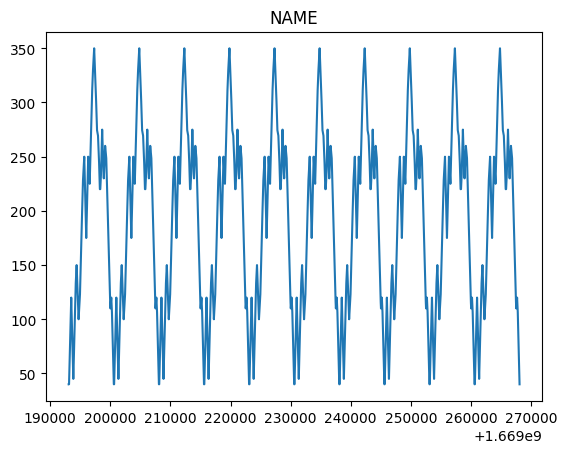

In [23]:
plot_rat_run_by_file(r".\Data\MultipleRuns\appended_results.txt", "x", "NAME")

In [35]:
def get_x_value_of_avisi_api(avisi_timestamp, result_location):
    
    value_to_find = datetime_to_float(avisi_str_to_datetime(avisi_timestamp))
    
    x_axis_array = []
    y_axis_array = []

    for line in get_data_x_position_coordinates_by_file_name(result_location):
        x_axis_array.append(line[0])
        y_axis_array.append(line[1])

    x = x_axis_array
    y = y_axis_array

    x_value_for_timestamp = np.interp(value_to_find, x,y)
    print("x_position for given timestamp is " + str(x_value_for_timestamp))
    return x_value_for_timestamp

def get_y_value_of_avisi_api(avisi_timestamp, result_location):
    
    value_to_find = datetime_to_float(avisi_str_to_datetime(avisi_timestamp))
    
    x_axis_array = []
    y_axis_array = []

    for line in get_data_y_position_coordinates_by_file_name(result_location):
        x_axis_array.append(line[0])
        y_axis_array.append(line[1])

    x = x_axis_array
    y = y_axis_array

    y_value_for_timestamp = np.interp(value_to_find, x,y)
    print("y_position for given timestamp is " + str(y_value_for_timestamp))
    return y_value_for_timestamp

def find_x_and_y_value_of_avisi_timestamp(avisi_timestamp, result_location):
    print("Avisi timestamp is: " + str(avisi_timestamp))
    res = datetime_to_float(avisi_str_to_datetime(avisi_timestamp))
    print("Float value of avisi timestamp: " + str(res))
    
    get_x_value_of_avisi_api(avisi_timestamp, result_location)
    get_y_value_of_avisi_api(avisi_timestamp, result_location)

In [36]:
find_x_and_y_value_of_avisi_timestamp("2022-11-23T17:30:51.589584Z", r".\Data\MultipleRuns\appended_results.txt")

Float value of avisi timestamp: 1669221051.589584
x_position for given timestamp is 253.72850873251613
y_position for given timestamp is 289.4539960858337


In [ ]:
# Deze code is verloren gegaan omdat er teveel .txt files waren en er met git iets mis ging... Hier gekeken hoeveel er precies bij opgeteld moest worden door
# de runs met elkaar te vergelijken